In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Set options to display all columns of the dataframe
pd.set_option('display.max_columns', None)

In [3]:
# Load the data into dataframe
df = pd.read_csv("Unemployment in India.csv")

In [4]:
# Display the first few rows of dataframe to get an initial view of the data
print(df.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [9]:
df.describe()

Estimated Unemployment Rate (%)   Estimated Employed  \
count                        740.000000         7.400000e+02   
mean                          11.787946         7.204460e+06   
std                           10.721298         8.087988e+06   
min                            0.000000         4.942000e+04   
25%                            4.657500         1.190404e+06   
50%                            8.350000         4.744178e+06   
75%                           15.887500         1.127549e+07   
max                           76.740000         4.577751e+07   

        Estimated Labour Participation Rate (%)  
count                                740.000000  
mean                                  42.630122  
std                                    8.111094  
min                                   13.330000  
25%                                   38.062500  
50%                                   41.160000  
75%                                   45.505000  
max                                   72.570000

In [10]:
df.shape

(740, 7)

In [11]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [12]:
# removing trailing and leading spaces from column names 
df.columns = df.columns.str.strip()

In [13]:
# Strip leading and trailing whitespaces from the 'Date' column in df
df['Date'] = df['Date'].str.strip()

# Convert the 'Date' column to a datetime object with the correct date format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract the month and create a new column 'Month' in df
df['Month'] = df['Date'].dt.month


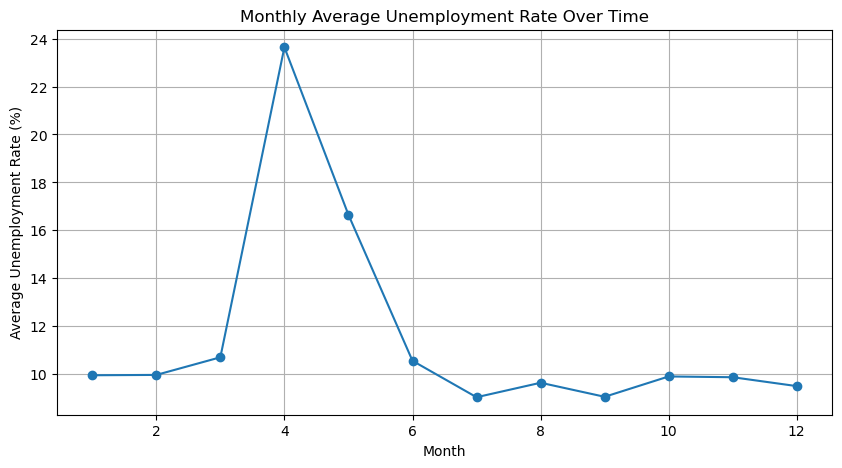

In [14]:
# Group data by month and calculate the average unemployment rate
monthly_avg_unemployment = df.groupby(df['Date'].dt.month)['Estimated Unemployment Rate (%)'].mean()

# Plot the monthly average unemployment rate
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_unemployment.index, monthly_avg_unemployment.values, marker='o')
plt.title('Monthly Average Unemployment Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate (%)')
plt.grid(True)
plt.show()

In [15]:
import calendar 
df['month_int'] = df['Date'].dt.month
df['month'] = df['month_int'].apply(lambda x: calendar.month_abbr[x])
df.head()

Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2019-05-31   Monthly                             3.65   
1  Andhra Pradesh 2019-06-30   Monthly                             3.05   
2  Andhra Pradesh 2019-07-31   Monthly                             3.75   
3  Andhra Pradesh 2019-08-31   Monthly                             3.32   
4  Andhra Pradesh 2019-09-30   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  Month  \
0          11999139.0                                    43.24  Rural      5   
1          11755881.0                                    42.05  Rural      6   
2          12086707.0                                    43.50  Rural      7   
3          12285693.0                                    43.97  Rural      8   
4          12256762.0                                    44.68  Rural      9   

   month_int month  
0          5   May  
1          6   Jun  
2          7   Jul  
3          8   Aug  
4          9   Sep

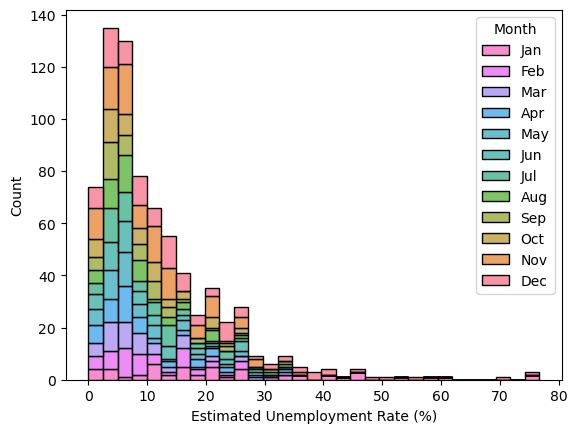

In [16]:
sns.histplot(data=df, x="Estimated Unemployment Rate (%)", hue="month", multiple="stack")
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.legend(title="Month", loc="upper right", labels=month_order)
# multiple="stack", the bars for different categories (months) are stacked on top of each other.

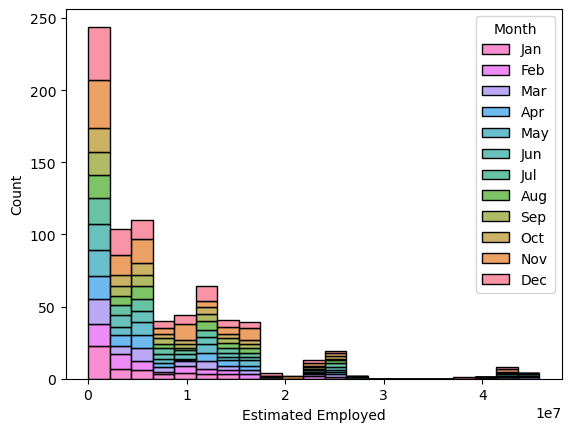

In [17]:
sns.histplot(data=df, x="Estimated Employed", hue="month", multiple="stack")
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.legend(title="Month", loc="upper right", labels=month_order)

<Axes: xlabel='Estimated Employed', ylabel='month'>

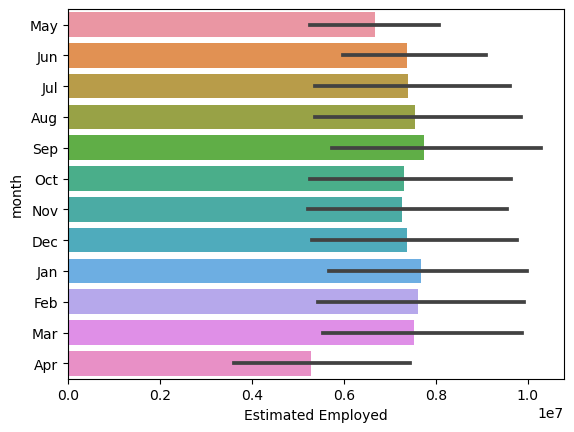

In [18]:
sns.barplot(x="Estimated Employed", y="month",data=df)

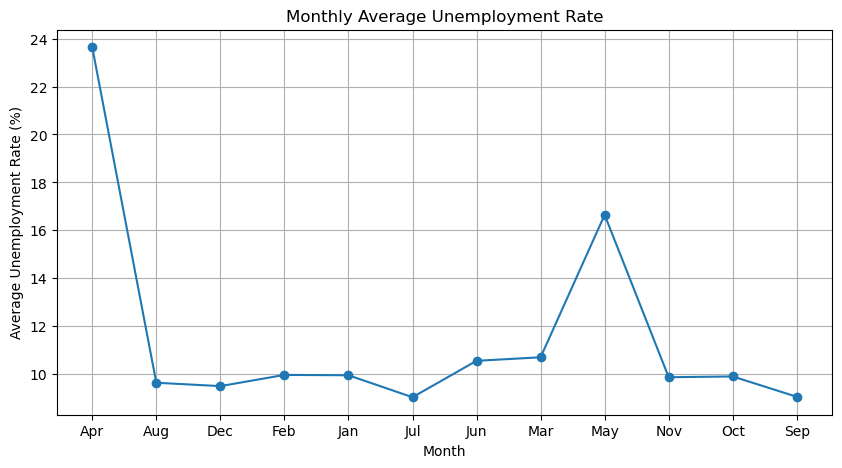

In [19]:
# Group data by month and calculate the average unemployment rate
monthly_avg_unemployment = df.groupby('month')['Estimated Unemployment Rate (%)'].mean()

# Plot the monthly average unemployment rate
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_unemployment.index, monthly_avg_unemployment.values, marker='o')
plt.title('Monthly Average Unemployment Rate')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate (%)')
plt.grid(True)
plt.show()

In [20]:
## Grouping state wise
state =  df.groupby(['Region'])[['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']].mean()
state = pd.DataFrame(state).reset_index()

In [21]:
fig = px.box(data_frame=df,x='Region',y='Estimated Unemployment Rate (%)',color='Region',title='Unemployment rate')
fig.update_layout(xaxis={'categoryorder':'total descending'})

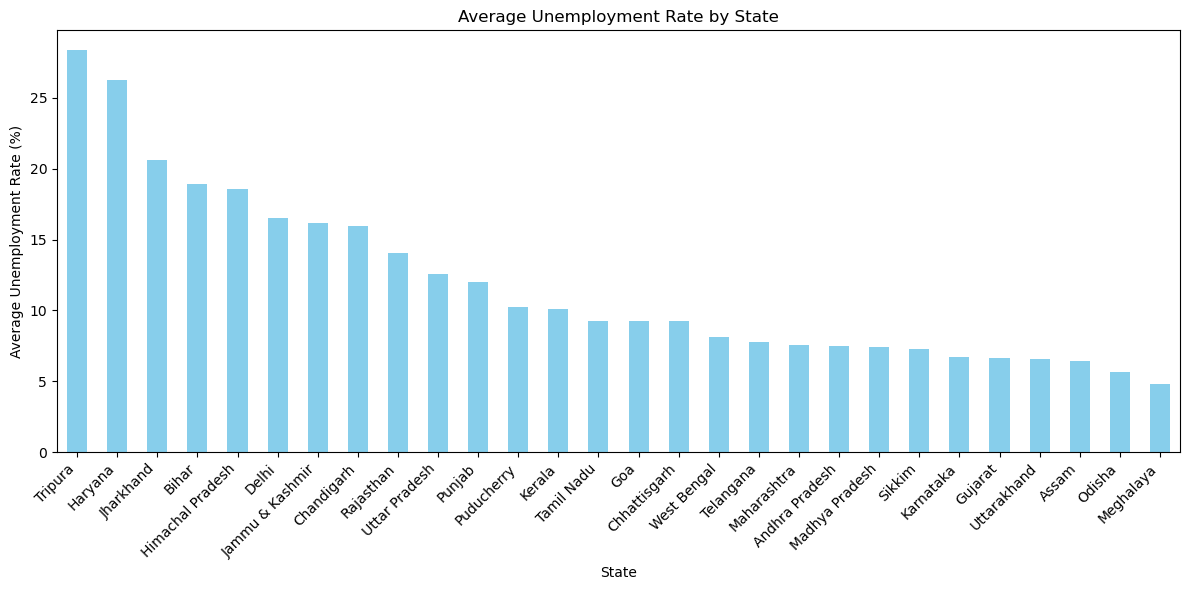

In [22]:
# Group data by 'Region' (assuming 'Region' represents states) and calculate the average unemployment rate for each state
state_avg_unemployment = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean()

# Sort states by unemployment rate in descending order for better visualization
state_avg_unemployment = state_avg_unemployment.sort_values(ascending=False)

# Plot a bar chart to visualize state-wise unemployment rates
plt.figure(figsize=(12, 6))
state_avg_unemployment.plot(kind='bar', color='skyblue')
plt.title('Average Unemployment Rate by State')
plt.xlabel('State')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
fig = px.bar(state,x='Region',y='Estimated Labour Participation Rate (%)',color='Region',title='Average Labour Participation Rate (State)')
fig.update_layout(xaxis={'categoryorder':'total descending'})

In [24]:
Area_data = df.groupby(['Area'])[['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']].mean()
Area_data = pd.DataFrame(Area_data).reset_index()

In [25]:
px.scatter_matrix(df,dimensions=['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)'],color='Area',
                 width=900, height=800)

C:\Users\nisha\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



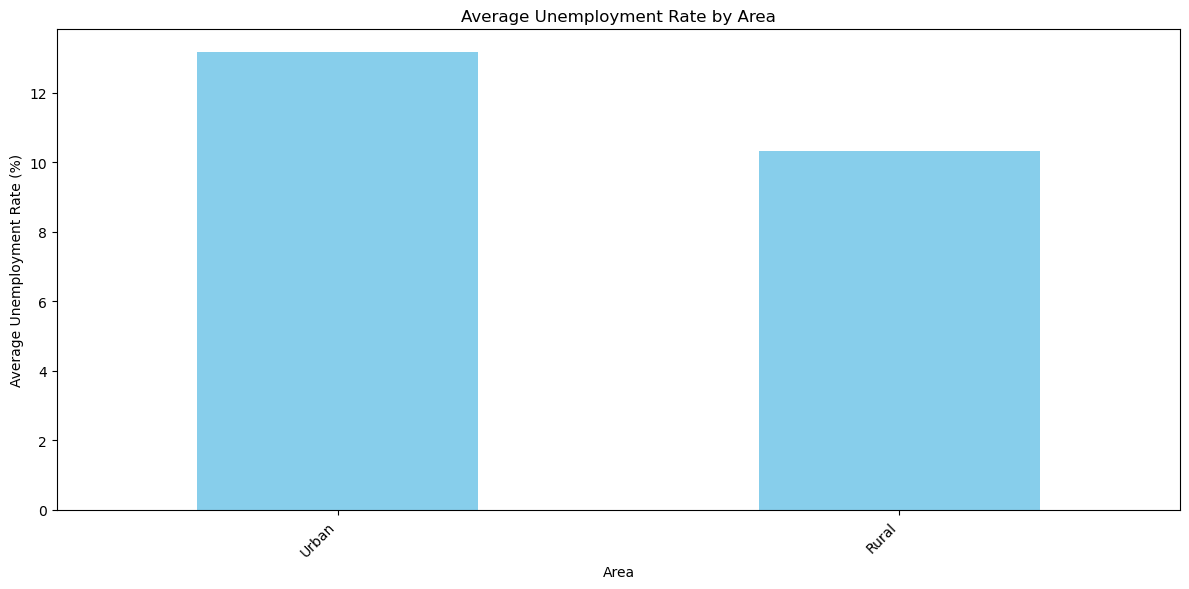

In [26]:
# Group data by 'Area' and calculate the average unemployment rate for each area
area_avg_unemployment = df.groupby('Area')['Estimated Unemployment Rate (%)'].mean()

# Sort areas by unemployment rate in descending order for better visualization
area_avg_unemployment = area_avg_unemployment.sort_values(ascending=False)

# Plot a bar chart to visualize area-wise unemployment rates
plt.figure(figsize=(12, 6))
area_avg_unemployment.plot(kind='bar', color='skyblue')
plt.title('Average Unemployment Rate by Area')
plt.xlabel('Area')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
region_area_data = df.groupby(['Area', 'Region'])[['Estimated Labour Participation Rate (%)', 'Estimated Employed']].mean().reset_index()
region_area_data.head()

Area          Region  Estimated Labour Participation Rate (%)  \
0  Rural  Andhra Pradesh                                42.963571   
1  Rural           Assam                                47.072500   
2  Rural           Bihar                                38.417143   
3  Rural    Chhattisgarh                                42.442857   
4  Rural           Delhi                                36.993571   

   Estimated Employed  
0        1.180859e+07  
1        9.716618e+06  
2        2.184369e+07  
3        6.501684e+06  
4        1.482493e+05

In [28]:
px.sunburst(region_area_data,path=['Area','Region'],values='Estimated Employed',
                 title ='Employment rate in State and Area',height=500,width=500)

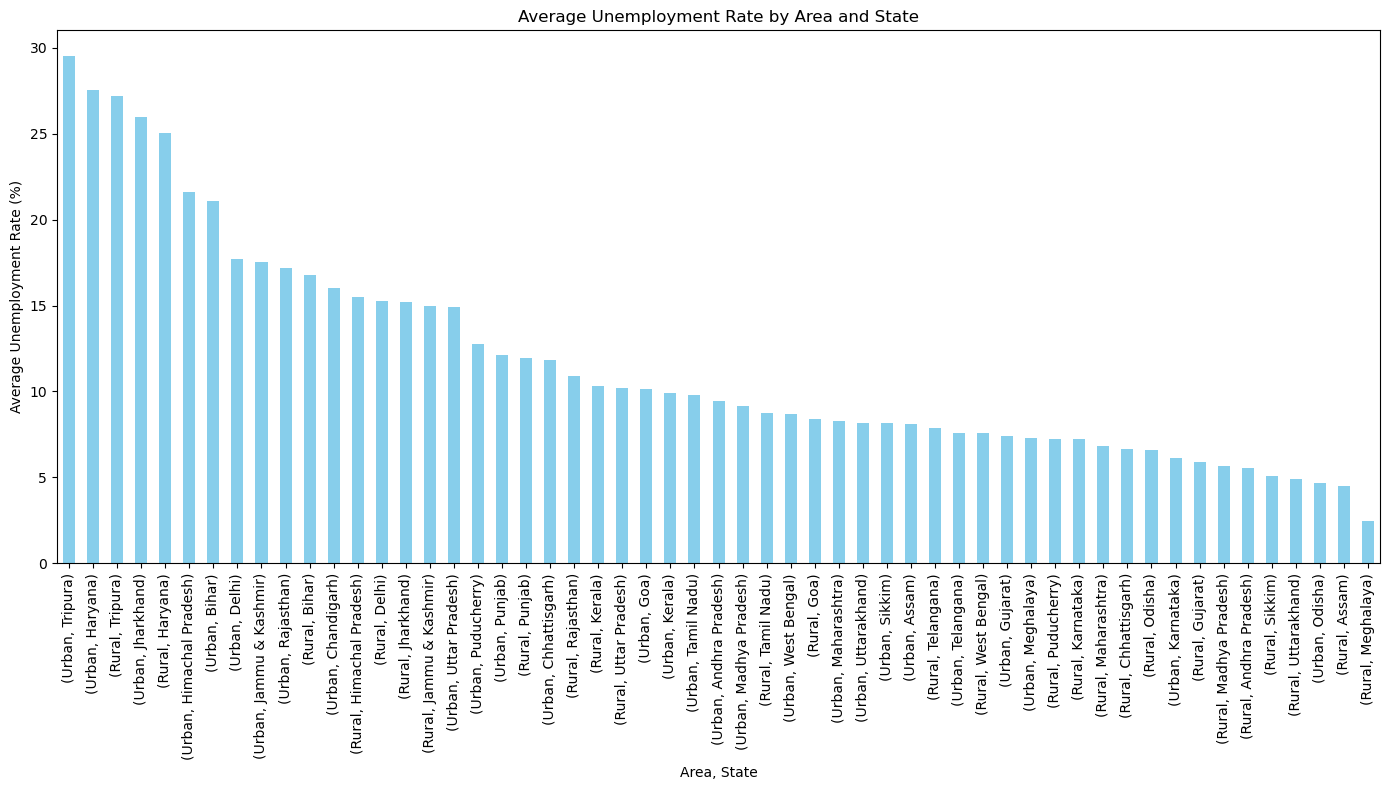

In [29]:
# Group data by both 'Area' and 'Region' (state) and calculate the average unemployment rate for each combination
area_state_avg_unemployment = df.groupby(['Area', 'Region'])['Estimated Unemployment Rate (%)'].mean()

# Sort the data by unemployment rate in descending order for better visualization
area_state_avg_unemployment = area_state_avg_unemployment.sort_values(ascending=False)

# Plot a bar chart to visualize area-state-wise unemployment rates
plt.figure(figsize=(14, 8))
area_state_avg_unemployment.plot(kind='bar', color='skyblue')
plt.title('Average Unemployment Rate by Area and State')
plt.xlabel('Area, State')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [30]:
import datetime as dt
import calendar

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [31]:
# Load the data into dataframe
df2 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [32]:
df2.shape

(267, 9)

In [33]:
df2.describe()

Estimated Unemployment Rate (%)   Estimated Employed  \
count                        267.000000         2.670000e+02   
mean                          12.236929         1.396211e+07   
std                           10.803283         1.336632e+07   
min                            0.500000         1.175420e+05   
25%                            4.845000         2.838930e+06   
50%                            9.650000         9.732417e+06   
75%                           16.755000         2.187869e+07   
max                           75.850000         5.943376e+07   

        Estimated Labour Participation Rate (%)   longitude    latitude  
count                                267.000000  267.000000  267.000000  
mean                                  41.681573   22.826048   80.532425  
std                                    7.845419    6.270731    5.831738  
min                                   16.770000   10.850500   71.192400  
25%                                   37.265000   18.112400   76.085600  
50%                                   40.390000   23.610200   79.019300  
75%                                   44.055000   27.278400   85.279900  
max                                   69.690000   33.778200   92.937600

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [35]:
df2.head()

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     79.74  
3    15.9129     79.74  
4    15.9129     79.74

In [36]:
df2.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [37]:
df2.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [38]:
df2.Region.value_counts()

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: Region, dtype: int64

In [39]:
#updating column names
df2.columns=['state','date','frequency','estimated unemployment rate','estimated employed','estimated labour participation rate','region','longitude','latitude']

In [40]:
df2['date']=pd.to_datetime(df2['date'],dayfirst=True)

In [41]:
df2['month_int']=df2['date'].dt.month
df2.head()

state       date frequency  estimated unemployment rate  \
0  Andhra Pradesh 2020-01-31         M                         5.48   
1  Andhra Pradesh 2020-02-29         M                         5.83   
2  Andhra Pradesh 2020-03-31         M                         5.79   
3  Andhra Pradesh 2020-04-30         M                        20.51   
4  Andhra Pradesh 2020-05-31         M                        17.43   

   estimated employed  estimated labour participation rate region  longitude  \
0            16635535                                41.02  South    15.9129   
1            16545652                                40.90  South    15.9129   
2            15881197                                39.18  South    15.9129   
3            11336911                                33.10  South    15.9129   
4            12988845                                36.46  South    15.9129   

   latitude  month_int  
0     79.74          1  
1     79.74          2  
2     79.74          3  
3     79.74          4  
4     79.74          5

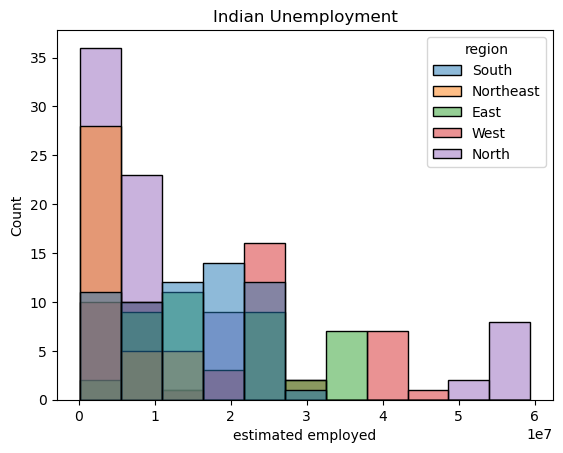

In [42]:
#The estimated number of employees according to different regions of India:
df2.columns= ["state","date","frequency",
               "estimated unemployment rate","estimated employed",
               "estimated labour participation rate","region",
               "longitude","latitude","month_int"]
plt.title("Indian Unemployment")
sns.histplot(x="estimated employed", hue="region", data=df2)
plt.show()

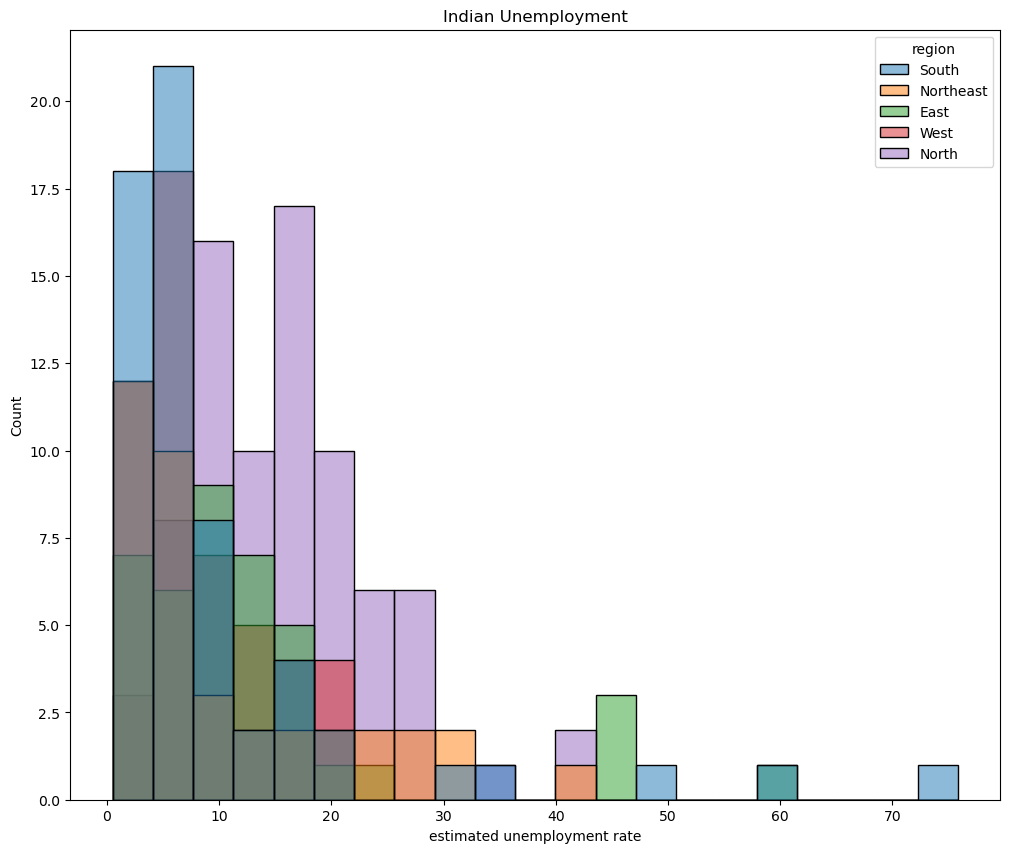

In [43]:
#The unemployment rate according to different regions of India:
plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment")
sns.histplot(x="estimated unemployment rate", hue="region", data=df2)
plt.show()

In [44]:
#Boxplot of Unemployment rate per States
fig = px.box(df2, x='state', y='estimated unemployment rate', color='state', title='Unemployment rate per States', template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [45]:
#Scatter matrix showing relationships between unemployment rate, employment, and labor participation rate, color-coded by region.
fig = px.scatter_matrix(df2, template='plotly',
                        dimensions=['estimated unemployment rate', 'estimated employed', 'estimated labour participation rate'],
                        color='region')
fig.show()

In [46]:
#Bar chart displaying the average unemployment rate in each state, color-coded by state.
plot_ump = df2[['estimated unemployment rate', 'state']]
data_unemp = plot_ump.groupby('state').mean().reset_index()
data_unemp = data_unemp.sort_values('estimated unemployment rate')
fig = px.bar(data_unemp, x='state', y='estimated unemployment rate', color='state',
             title='Average Unemployment Rate in each state', template='plotly')
fig.show()

In [47]:
#Let’s create a dashboard to analyze the unemployment rate of each Indian state by region.
unemploment = df2[["state", "region", "estimated unemployment rate"]]
figure = px.sunburst(unemploment, path=["region", "state"], 
                     values="estimated unemployment rate", 
                     width=700, height=700, color_continuous_scale="RdY1Gn", 
                     title="Unemployment Rate in India")
figure.show()

In [48]:
fig = px.scatter_geo(df2,'longitude', 'latitude', color="region",
                     hover_name="state", size="estimated unemployment rate",
                     animation_frame="month_int",scope='asia',template='plotly',title='Impact of lockdown on employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#6dd5ed",
    showocean=True)

fig.show()

In [49]:
#data representation before and after the lockdown
after_lockdown = df2[(df2['month_int'] >= 4) & (df2['month_int'] <=6)]
before_lockdown = df2[(df2['month_int'] >= 1) & (df2['month_int'] <=4)]

In [50]:
af_lockdown=after_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()
lockdown= before_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()
lockdown['unemployment rate before lockdown'] = af_lockdown['estimated unemployment rate']

lockdown.columns=['state','unemployment rate before lockdown','unemployment rate after lockdown']
lockdown.head()

state  unemployment rate before lockdown  \
0  Andhra Pradesh                             9.4025   
1           Assam                             6.2250   
2           Bihar                            20.7425   
3    Chhattisgarh                             7.2450   
4           Delhi                            17.6975   

   unemployment rate after lockdown  
0                         13.750000  
1                          7.070000  
2                         36.806667  
3                          9.380000  
4                         25.713333

In [51]:
#Unemployment rate change after lockdown
lockdown['rate change in unemployment']=round(lockdown['unemployment rate before lockdown']-lockdown['unemployment rate before lockdown']
                                             /lockdown['unemployment rate after lockdown'],2)

In [52]:
#Unemployment rate change after lockdown
lockdown['rate change in unemployment']=round(lockdown['unemployment rate before lockdown']-lockdown['unemployment rate before lockdown']
                                             /lockdown['unemployment rate after lockdown'],2)

In [53]:
#Unemployment rate change after lockdown
lockdown['rate change in unemployment']=round(lockdown['unemployment rate before lockdown']-lockdown['unemployment rate before lockdown']
                                             /lockdown['unemployment rate after lockdown'],2)

In [54]:
import plotly.express as px

fig = px.bar(lockdown, x='state', y='rate change in unemployment', color='rate change in unemployment',
             title='Percentage change in unemployment rate in each state after lockdown', template='ggplot2')
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()